<a href="https://colab.research.google.com/github/jorge673/ADA/blob/main/Informe-SubArreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de sub-arreglo maximo

>**Entrada:** Un arreglo de n elementos $a=[a_1.....a_n]$
>
>**Salida**: Un sub-arreglo de $a$ tal que la suma de sus elementos sea mayor que los demas sub arreglos.

![image](https://media.geeksforgeeks.org/wp-content/uploads/maximum-subarray-sum-is-7.jpg)

El problema trata de encontrar un subarreglo contiguio con la suma mas grande dentro de un arreglo ($a=[a_1.....a_n]$).

##-Aplicaciones

tiene aplicaciones en muchas areas como:

>**El analisis de secuancias geonomicas**: Emplea algoritmos de subarreglo máximo para identificar segmentos biológicos importantes de secuencias de proteínas.
> 
>**Vision artificial**: los algoritmos de subarreglo máximo se utilizan en imágenes de mapa de bits para detectar el área más brillante de una imagen.


# 2. Descripcion del teorema

In [92]:
import random
from termcolor import colored
import copy



def MaxSubArrayMid(arr,low,med,high,verbose=False,espaciado=""):

  global GIGA,inf,sup

  imedi=low
  smedd=high

  suma=0
  izq_max=-10000
  

  if(verbose):
    print("-----------------------------------------------------")
    print(espaciado+"(Funcion MaxSubArrayMid)\n")
    espaciado="   "+espaciado[:-2]
    print(espaciado+"Sub-array =",arr[low:high+1])

  for i in range(med, low-1, -1):
        suma = suma + arr[i]
 
        if (suma > izq_max):
            imedi=i
            izq_max = suma

  if(verbose):
    print("\n"+espaciado+"MITAD IZQUIRDA:")
    print("   "+espaciado+"["+str(arr[:imedi])[1:-1]+", "+colored(f"{str(arr[imedi:med+1])[1:-1]}","red")+", "+str(arr[med+1:])[1:-1]+"]")
    print("   "+espaciado+"Maximo izquierdo =", izq_max)

  suma=0
  der_max=-10000

  for i in range(med+1,high+1):
        suma = suma + arr[i]
        
        if (suma > der_max):
            smedd = i
            der_max = suma  

  if(verbose):
    print("\n"+espaciado+"MITAD DERECHA:")
    print("   "+espaciado+"["+str(arr[:med+1])[1:-1]+", "+colored(f"{str(arr[med+1:smedd+1])[1:-1]}","blue")+", "+str(arr[smedd+1:])[1:-1]+"]")
    print("   "+espaciado+"Maximo derecho =", der_max,"\n")
    
    print(espaciado+"MITAD DERECHA + MITAD IZQUIRDA :")


    print("   "+espaciado+"["+str(arr[:imedi])[1:-1], end=", ")

    if(arr[imedi:med+1] != []):
      print(colored(f"{str(arr[imedi:med+1])[1:-1]}","red"),end=", ")

    if(arr[med+1:smedd+1] != []):
      print(", "+colored(f"{str(arr[med+1:smedd+1])[1:-1]}","blue"),end="")

    print(", "+str(arr[smedd+1:])[1:-1]+"]")


    print("   "+espaciado+"Maximo =",der_max+izq_max)
    print("-----------------------------------------------------")

  if(GIGA < der_max+izq_max):
    GIGA = der_max+izq_max
    inf=imedi
    sup=smedd

  return der_max+izq_max


def MaxSubArray(arr,low,high,verbose=False,espaciado=""):
  
  global GIGA,inf,sup
  
  
  linea=espaciado+"└─"

  if(verbose and arr != [] ):
    print(linea+"Sub-arreglo:",arr[low:high+1])

  if(low==high):

    if(verbose):
      print(espaciado+"   Es de orden 1\n")

    if(GIGA < arr[low]):
      GIGA = arr[low]
      sup=low
      inf=low

    return arr[low]

  
  elif verbose:
    print("")
    espaciado+="  "

  med=(low+high)//2

  max_izq=MaxSubArray(arr,low,med,verbose,espaciado)
  max_der=MaxSubArray(arr,med+1,high,verbose,espaciado)
  max_mid=MaxSubArrayMid(arr,low,med,high,verbose,linea)

  return max(max_izq,max_der,max_mid)
    
a = [1,2,3,4,5,6,7]
n = len(a)
GIGA=-10000000

print("La Mayor suma es =",MaxSubArray(a,0,n-1,False,""))
print("sub-arreglo ="+"["+str(a[:inf])[1:-1]+", "+colored(f"{str(a[inf:sup+1])[1:-1]}","green")+", "+str(a[sup+1:])[1:-1]+"]")


La Mayor suma es = 28
sub-arreglo =[, 1, 2, 3, 4, 5, 6, 7, ]


##MaxSubArray

el agoritmo () es muy parecido a marge-sort ya que usa el paradigma de divide y conquista, este recibe un arreglo `a` con una cantidad de $n$ elementos, recive el indice inferior `low` del arreglo que seria 0 en la primera iteracion y la variable `high` que es el indice superior del arreglo osea `n`.

 1. Si `low = high` retorna el arreglo ya que seria de orden 1.

 2. Deduce el indice que esta en la mitad (`(low+high)//2`) luego se genera: 
>`max_izq` = MaxSubArray desde el indice inferior hasta el de la mitad,
>
>`max_der` = MaxSubArray desde el indice medio hasta el superior
>
>`max_mid` = MaxSubArrayMid desde el incice inferior hasta el superior el arrelgo

luego compara estos 3 y retorna el mayor

##MaxSubArrayMid
esta funcion recibe 4 parametros que serian **( `arr` El arreglo ; `low` indice inferior ; `med` indice medio ; `high` indice superior )**

La funcion calcula los sub-arreglos con tamaño $n/2$ con $n$ el largo de `arr` primero calcula la suma la mitad izquierda del arreglo (`low` hasta `med`), luego de la mitad derecha (`med` hasta `hight`) y al final retorna la suma de ambos maximos

#**3. Tiempo de ejecucion**



##Teorema

>*El agloritmo **MaxSubArrayMid** tiene un tiempo de ejecucion de $O(nlog(n))$*

##Prueba del algoritmo

Como se menciono antes el algoritmo se parece a MargeSort el cual al igual que este algoritmo tanto en el peor caso como en el mejor caso va hacer la misma cantidad de iteraciones

##Ejemplo

In [98]:
a = [1,2,3,4,5]
n = len(a)
GIGA=-10000000
print("La Mayor suma es =",MaxSubArray(a,0,n-1,True))
print("Indice inicial :",inf,"\nIndice final:",sup)
print("sub-arreglo ="+"["+str(a[:inf])[1:-1]+", "+colored(f"{str(a[inf:sup+1])[1:-1]}","green")+", "+str(a[sup+1:])[1:-1]+"]")

└─Sub-arreglo: [1, 2, 3, 4, 5]

  └─Sub-arreglo: [1, 2, 3]

    └─Sub-arreglo: [1, 2]

      └─Sub-arreglo: [1]
         Es de orden 1

      └─Sub-arreglo: [2]
         Es de orden 1

-----------------------------------------------------
    └─(Funcion MaxSubArrayMid)

       Sub-array = [1, 2]

       MITAD IZQUIRDA:
          [, 1, 2, 3, 4, 5]
          Maximo izquierdo = 1

       MITAD DERECHA:
          [1, 2, 3, 4, 5]
          Maximo derecho = 2 

       MITAD DERECHA + MITAD IZQUIRDA :
          [, 1, , 2, 3, 4, 5]
          Maximo = 3
-----------------------------------------------------
    └─Sub-arreglo: [3]
       Es de orden 1

-----------------------------------------------------
  └─(Funcion MaxSubArrayMid)

     Sub-array = [1, 2, 3]

     MITAD IZQUIRDA:
        [, 1, 2, 3, 4, 5]
        Maximo izquierdo = 3

     MITAD DERECHA:
        [1, 2, 3, 4, 5]
        Maximo derecho = 3 

     MITAD DERECHA + MITAD IZQUIRDA :
        [, 1, 2, , 3, 4, 5]
        Maximo = 6
---

A pesar de que a simple vista se sabe cual es el sub arreglo mas grande el algoritmo aun asi hacer todo el proceso de recurcion, este se divide en 2 mitades de largo $n/2$ y hace el trabajo de MaxSubArray a cada una de estas

Luego MaxSubArrayMid el cual tiene complejidad $O(n^2)$ se le entrega el arreglo completo para que saque la suma total del arreglo

Utilisando la relacion de recurrencia nos daria que:

$$T(n)=2T(\frac{n}{2})+O(n^2)$$


y utilisando el teorema maestro nos da que la complejidad del algoritmo da:

$$O(nlog(n))$$



#4. Correctitud


##Propiedad ivariable de bucle:

>"***en cada una de las iteracion MaxSubArrayMid el algoritmo busca la mayor suma de la dos mitades y retorna ambas sumadas***"

**Inicialización**: Al iniciar el algoritmo hambos ciclos empiensa en el mismo punto

**Mantecion**: Ambos iran sumando respectivamente dependiendo su mitad (si es la izquierda sumara hacia la izquierda y si va a la derecha sumara hacia la derecha) 

**Finalizacion**: Se sacan los maximos de ambas mitades y se suman 

##Inducción matemática:

>"***P(n) retorna un arreglo de n elementos Caso Base***"

Cuando $n = 1$, MaxSubArray retorna el elemento sin realizar ninguna operación, debido a que tecnicamente no puede haber mas Sub-arreglos

Paso Inductivo:
Para un arreglo de $n$-elementos se crean 2 subarreglos de largo $m = n/2$ que se ordenan usando MaxSubArray de manera recursiva, por lo que eventualmente llegara al caso $n = 1$ (Caso Base) para retornar dicho valor

#5.Experimentacion

##Comparaciones con Kadane, Furza bruta y Divide y conquista

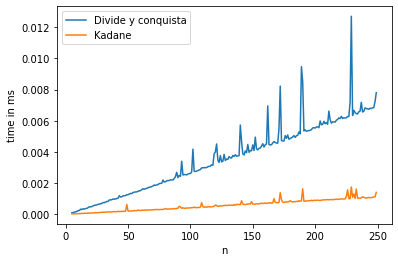

In [100]:
def kadane(numbers):
    """Find the largest sum of any contiguous subarray."""
    if numbers == []:
        raise ValueError('Empty array has no nonempty subarrays')

    best_sum = float('-inf')
    current_sum = 0
    for x in numbers:
        current_sum = max(x, current_sum + x)   
        best_sum = max(best_sum, current_sum)
    return best_sum

import matplotlib.pyplot as plt
import datetime
from timeit import repeat

xk=[]; yk=[]
xd=[]; yd=[]

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  xk.append(n)
  yk.append(t)

  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  xd.append(n)
  yd.append(t)


plt.plot(xd,yd)
plt.plot(xk,yk)
plt.legend(["Divide y conquista","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

#Analisis

Como podemos apresiar a Kadane tiene un mejor tiempo que Divide y conquista siendo el cual es O(n) esto ocurre ya que kadane funciona como MaxSubArrayMid cuando recorre las mitades con la diferencia que recorre desde inicio hasta fin en un solo ciclo lo cual reduce mucho los tiempos 

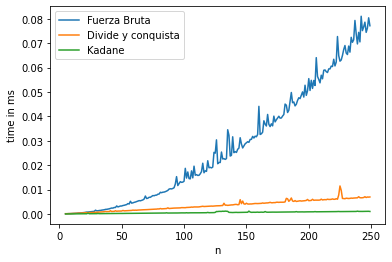

In [101]:

def fuerzaBruta(arr):
  best_sum = float('-inf')
  current_sum = 0
  for i in range(0,len(a)):
    current_sum=0
    for j in range(i,len(a)):
      current_sum+=arr[j]
      best_sum = max(best_sum, current_sum)

  return best_sum


import matplotlib.pyplot as plt
import datetime
from timeit import repeat

xk=[]; yk=[]
xf=[]; yf=[]
xd=[]; yd=[]

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import fuerzaBruta", stmt=f"fuerzaBruta({a})", repeat=1, number=10)

  xf.append(n)
  yf.append(t)

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  xk.append(n)
  yk.append(t)

for n in range(5,250):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  xd.append(n)
  yd.append(t)


plt.plot(xf,yf)
plt.plot(xd,yd)
plt.plot(xk,yk)
plt.legend(["Fuerza Bruta","Divide y conquista","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

#analisis

Comparando todos los algoritmos para el problema de Sub-arreglo maximo de lo cual podemos decucir que

* Divide y conquista a pesar de ser lento aun asi no pasa de la milesima 0.01 en los primeros 250 casos
* Kadane es el mas rapido y simple de los 3
* Fuerza Bruta es mucho mas lento que los 3 porque su complejidad es $O(n)^2$ al hacer recorrer $n$ veces el arreglo
